In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
ross_df = pd.read_csv('/content/train.csv')
store_df = pd.read_csv('/content/store.csv')
test_df = pd.read_csv('/content/test.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [ ]:
ross_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
test_df


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# Let's merge the information from store_df into train_df and test_df.

In [ ]:
merged_df = ross_df.merge(store_df, how = 'left', on = 'Store')
merged_test_df = test_df.merge(store_df, how = 'left', on = 'Store')

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# Exploratory Data Analysis and Exploration

# Preprocessing and Feature Engineering

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

# Date
First, let's convert Date to a datecolumn and extract different parts of the date.

In [ ]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [ ]:
split_date(merged_df)
split_date(merged_test_df)

In [ ]:
# Show all columns
pd.set_option('display.max_columns', None)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


# Store Open/Closed
Next, notice that the sales are zero whenever the store is closed.

In [ ]:
merged_df[merged_df.Open == 0].Sales.value_counts()

,count
Sales,
0,172817


172817 rows have store closed


Instead of trying to model this relationship, it would be better to hard-code it in our predictions, and remove the rows where the store is closed. We won't remove any rows from the test set, since we need to make predictions for every row.

In [ ]:
merged_df = merged_df[merged_df.Open == 1].copy()

# Competition
Next, we can use the columns CompetitionOpenSince[Month/Year] columns from store_df to compute the number of months for which a competitor has been open near the store.

In [ ]:
def comp_months(df):
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [ ]:
comp_months(merged_df)
comp_months(merged_test_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [ ]:
def check_promo_month (row) :
    month2str = {1: 'Jan'
    , 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec' }
    try:
        months = (row[ 'PromoInterval'] or '').split(',')
        if row ['Promo20pen' ] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek) * (12 / 52)

    # Replace negative values with 0 and fill NaN values with 0, then multiply by Promo2 status
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']

    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']




In [ ]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [ ]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.153846,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.923077,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.153846,0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000,0


# Input and target Columns
Let's select columns we will use for training

In [ ]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [ ]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday',
'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen',
'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2',
'Promo2Open',
'IsPromo2Month' ]
target_col = 'Sales'

In [ ]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [ ]:
test_inputs = merged_test_df[input_cols].copy()

In [ ]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday','CompetitionDistance', 'CompetitionOpen','Promo2', 'Promo2Open', 'IsPromo2Month',
'Day', 'Month', 'Year', 'WeekOfYear']
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment' ]

# Impute Missing Numerical Data

In [ ]:
inputs[numeric_cols].isna().sum()

,0
Store,0
Promo,0
SchoolHoliday,0
CompetitionDistance,2186
CompetitionOpen,0
Promo2,0
Promo2Open,0
IsPromo2Month,0
Day,0
Month,0


In [ ]:
test_inputs[numeric_cols].isna().sum()

,0
Store,0
Promo,0
SchoolHoliday,0
CompetitionDistance,96
CompetitionOpen,0
Promo2,0
Promo2Open,0
IsPromo2Month,0
Day,0
Month,0


Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [ ]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [ ]:
inputs['CompetitionDistance'].fillna(max_distance * 2, inplace = True)
test_inputs['CompetitionDistance'].fillna(max_distance * 2, inplace = True)

<ipython-input-32-3d324a4ae02d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  inputs['CompetitionDistance'].fillna(max_distance * 2, inplace = True)
<ipython-input-32-3d324a4ae02d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

# Scale Numeric Values from 0 to 1 range

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Encode Categorical Columns
Let's one hot encode categorical columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
inputs[categorical_cols]


,DayOfWeek,StateHoliday,StoreType,Assortment
0,5,0,c,a
1,5,0,a,a
2,5,0,a,a
3,5,0,c,c
4,5,0,a,a
...,...,...,...,...
1016776,2,a,b,a
1016827,2,a,b,b
1016863,2,a,b,b
1017042,2,a,b,b


In [ ]:
for col in categorical_cols:
    inputs[col] = inputs[col].astype(str)

for col in categorical_cols:
    test_inputs[col] = test_inputs[col].astype(str)

encoder = OneHotEncoder (sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols) )

In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

 Finally, let's extract out all the numeric data for training.

In [ ]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

We haven't created a validation set yet, because we'll use K-fold cross validation.

# Gradient Boosting Model

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:
1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to predict just the residuals for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.
The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [ ]:
!pip uninstall xgboost -y
!pip install xgboost


Found existing installation: xgboost 2.1.3
Uninstalling xgboost-2.1.3:
  Successfully uninstalled xgboost-2.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.4 MB/s eta 0:00:00


In [ ]:
import xgboost
import sklearn

print("XGBoost version:", xgboost.__version__)
print("scikit-learn version:", sklearn.__version__)


XGBoost version: 2.1.3
scikit-learn version: 1.6.0


In [ ]:
from xgboost import XGBRegressor

In [ ]:
%%time
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 20, max_depth = 4)
model.fit(X, targets)

NameError: name 'XGBRegressor' is not defined

# Predictions
we can now make predictions and evaluate the model

In [ ]:
preds = model.predict(X)
preds

array([ 8010.316 ,  7279.527 ,  8705.701 , ...,  7457.6553,  7896.6743,
       10310.227 ], dtype=float32)

# Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def rmse(a, b):
    return np.sqrt(mean_squared_error(a, b))

# Now call the function
rmse_value = rmse(preds, targets)
print("RMSE:", rmse_value)

RMSE: 2400.677300263407


# Visualisation

In [ ]:
!pip install graphviz

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 30, 30

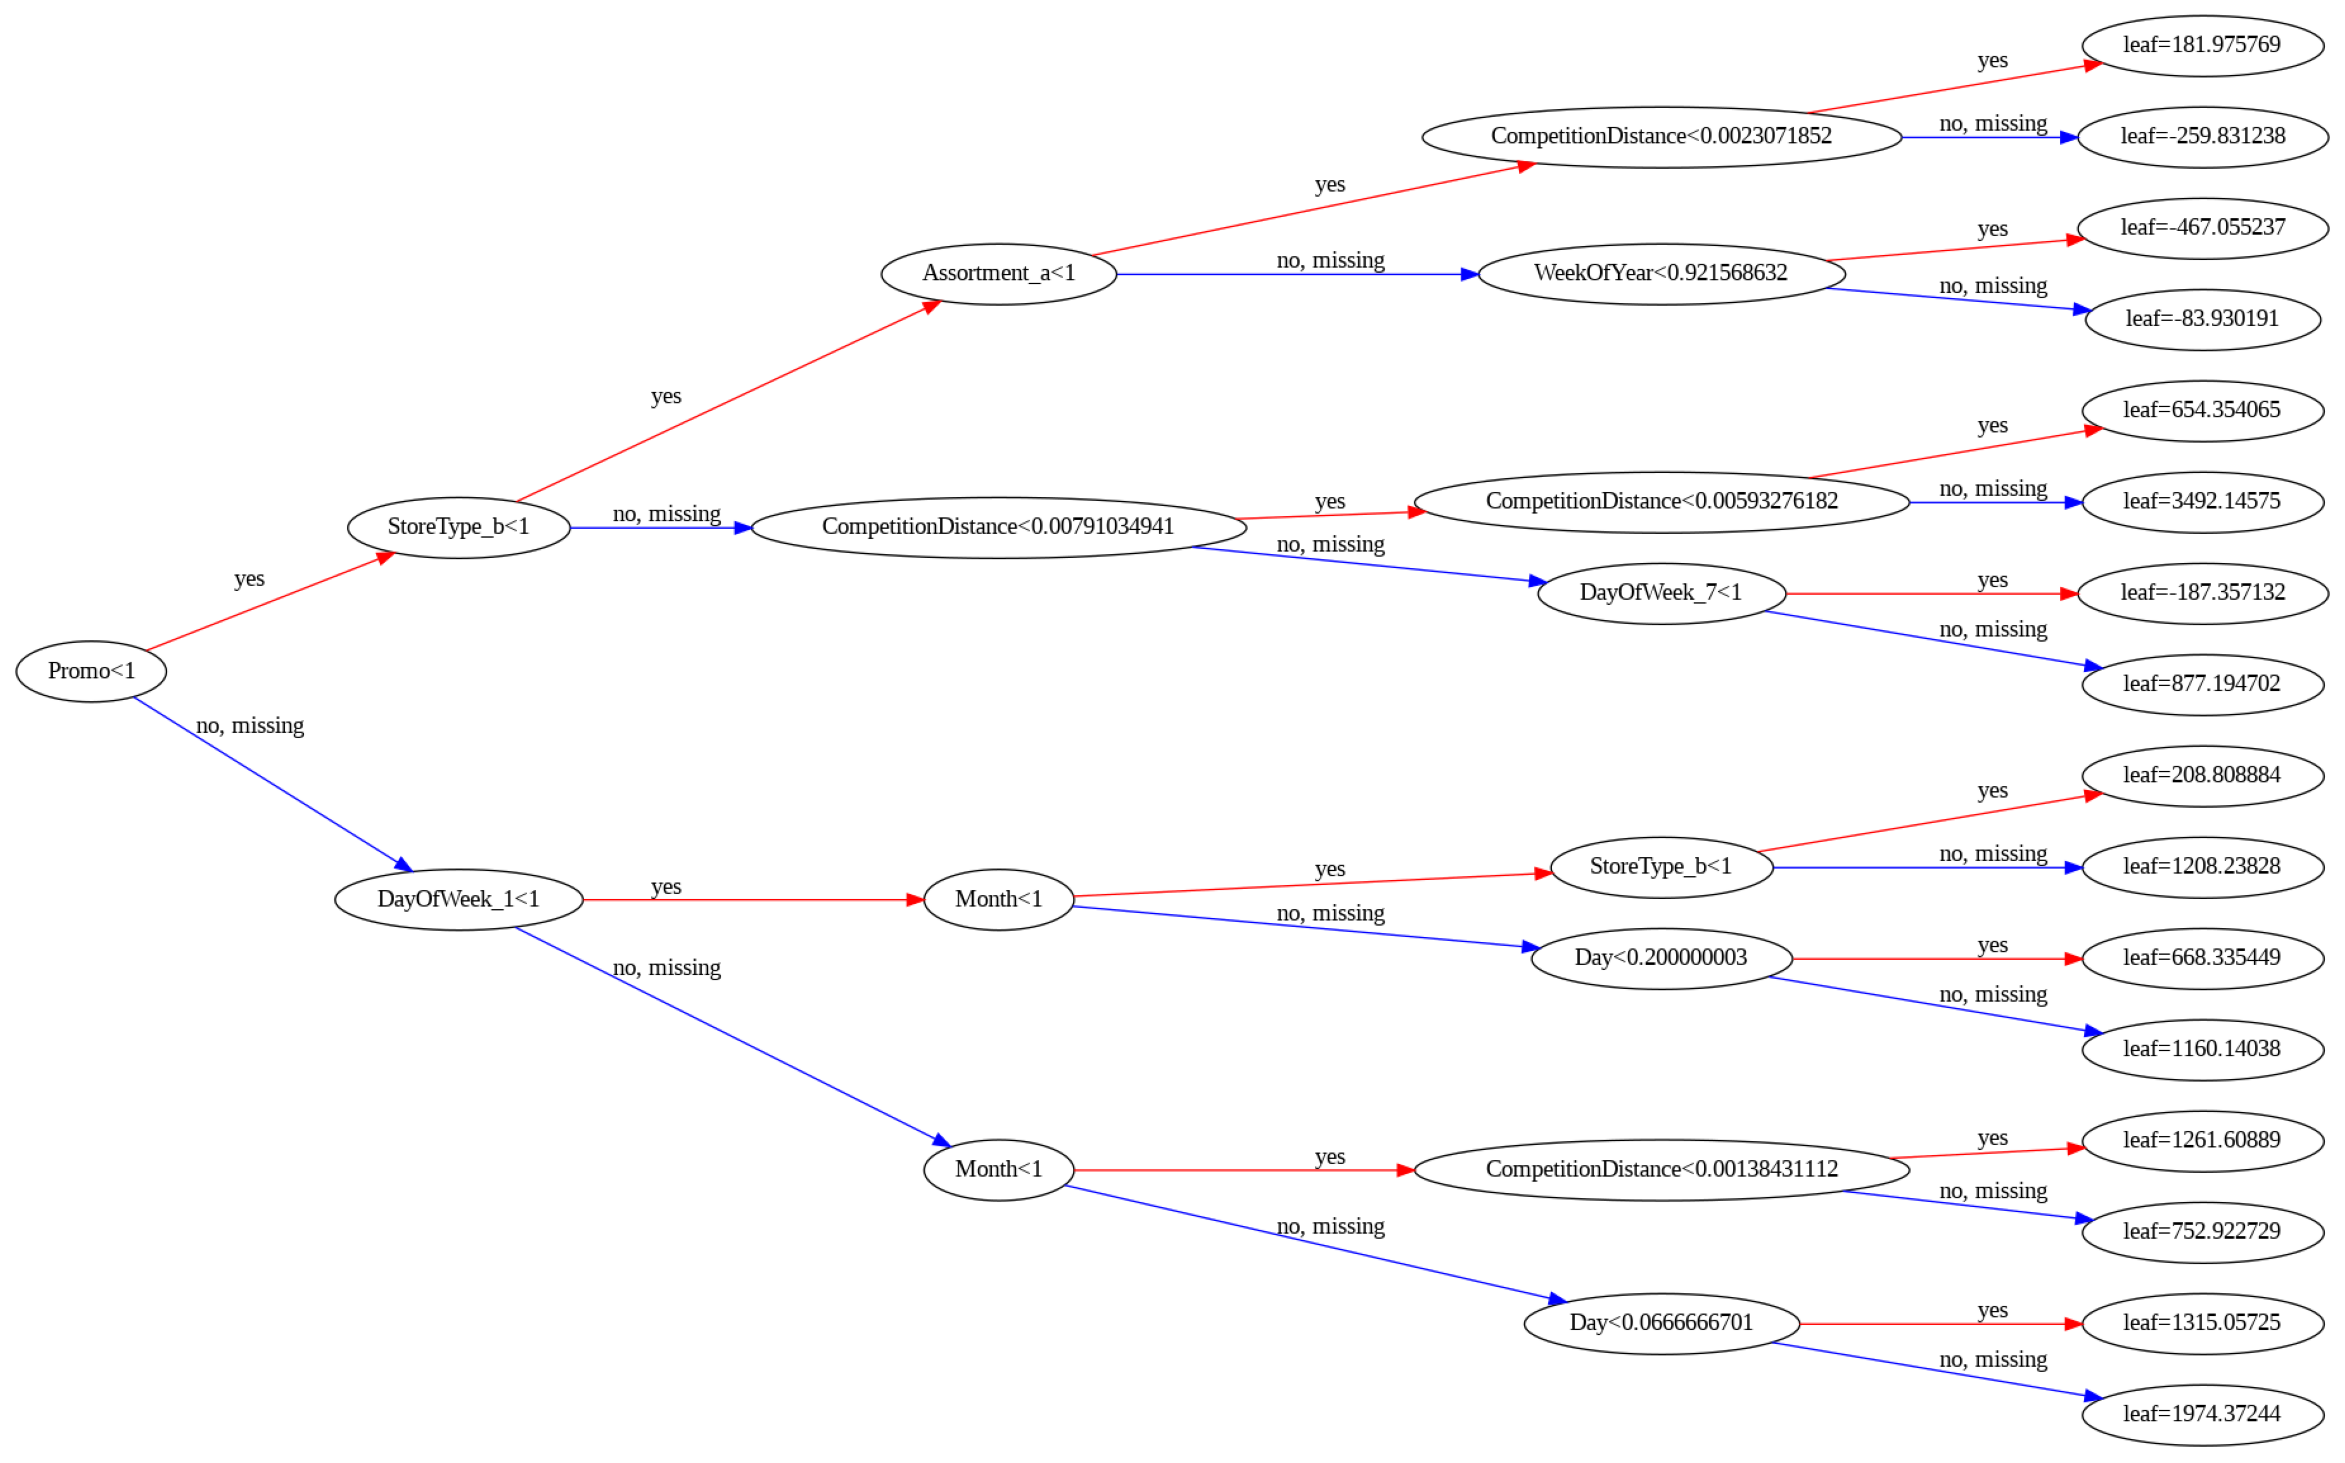

In [ ]:
plot_tree(model, rankdir = 'LR', num_trees = 0);

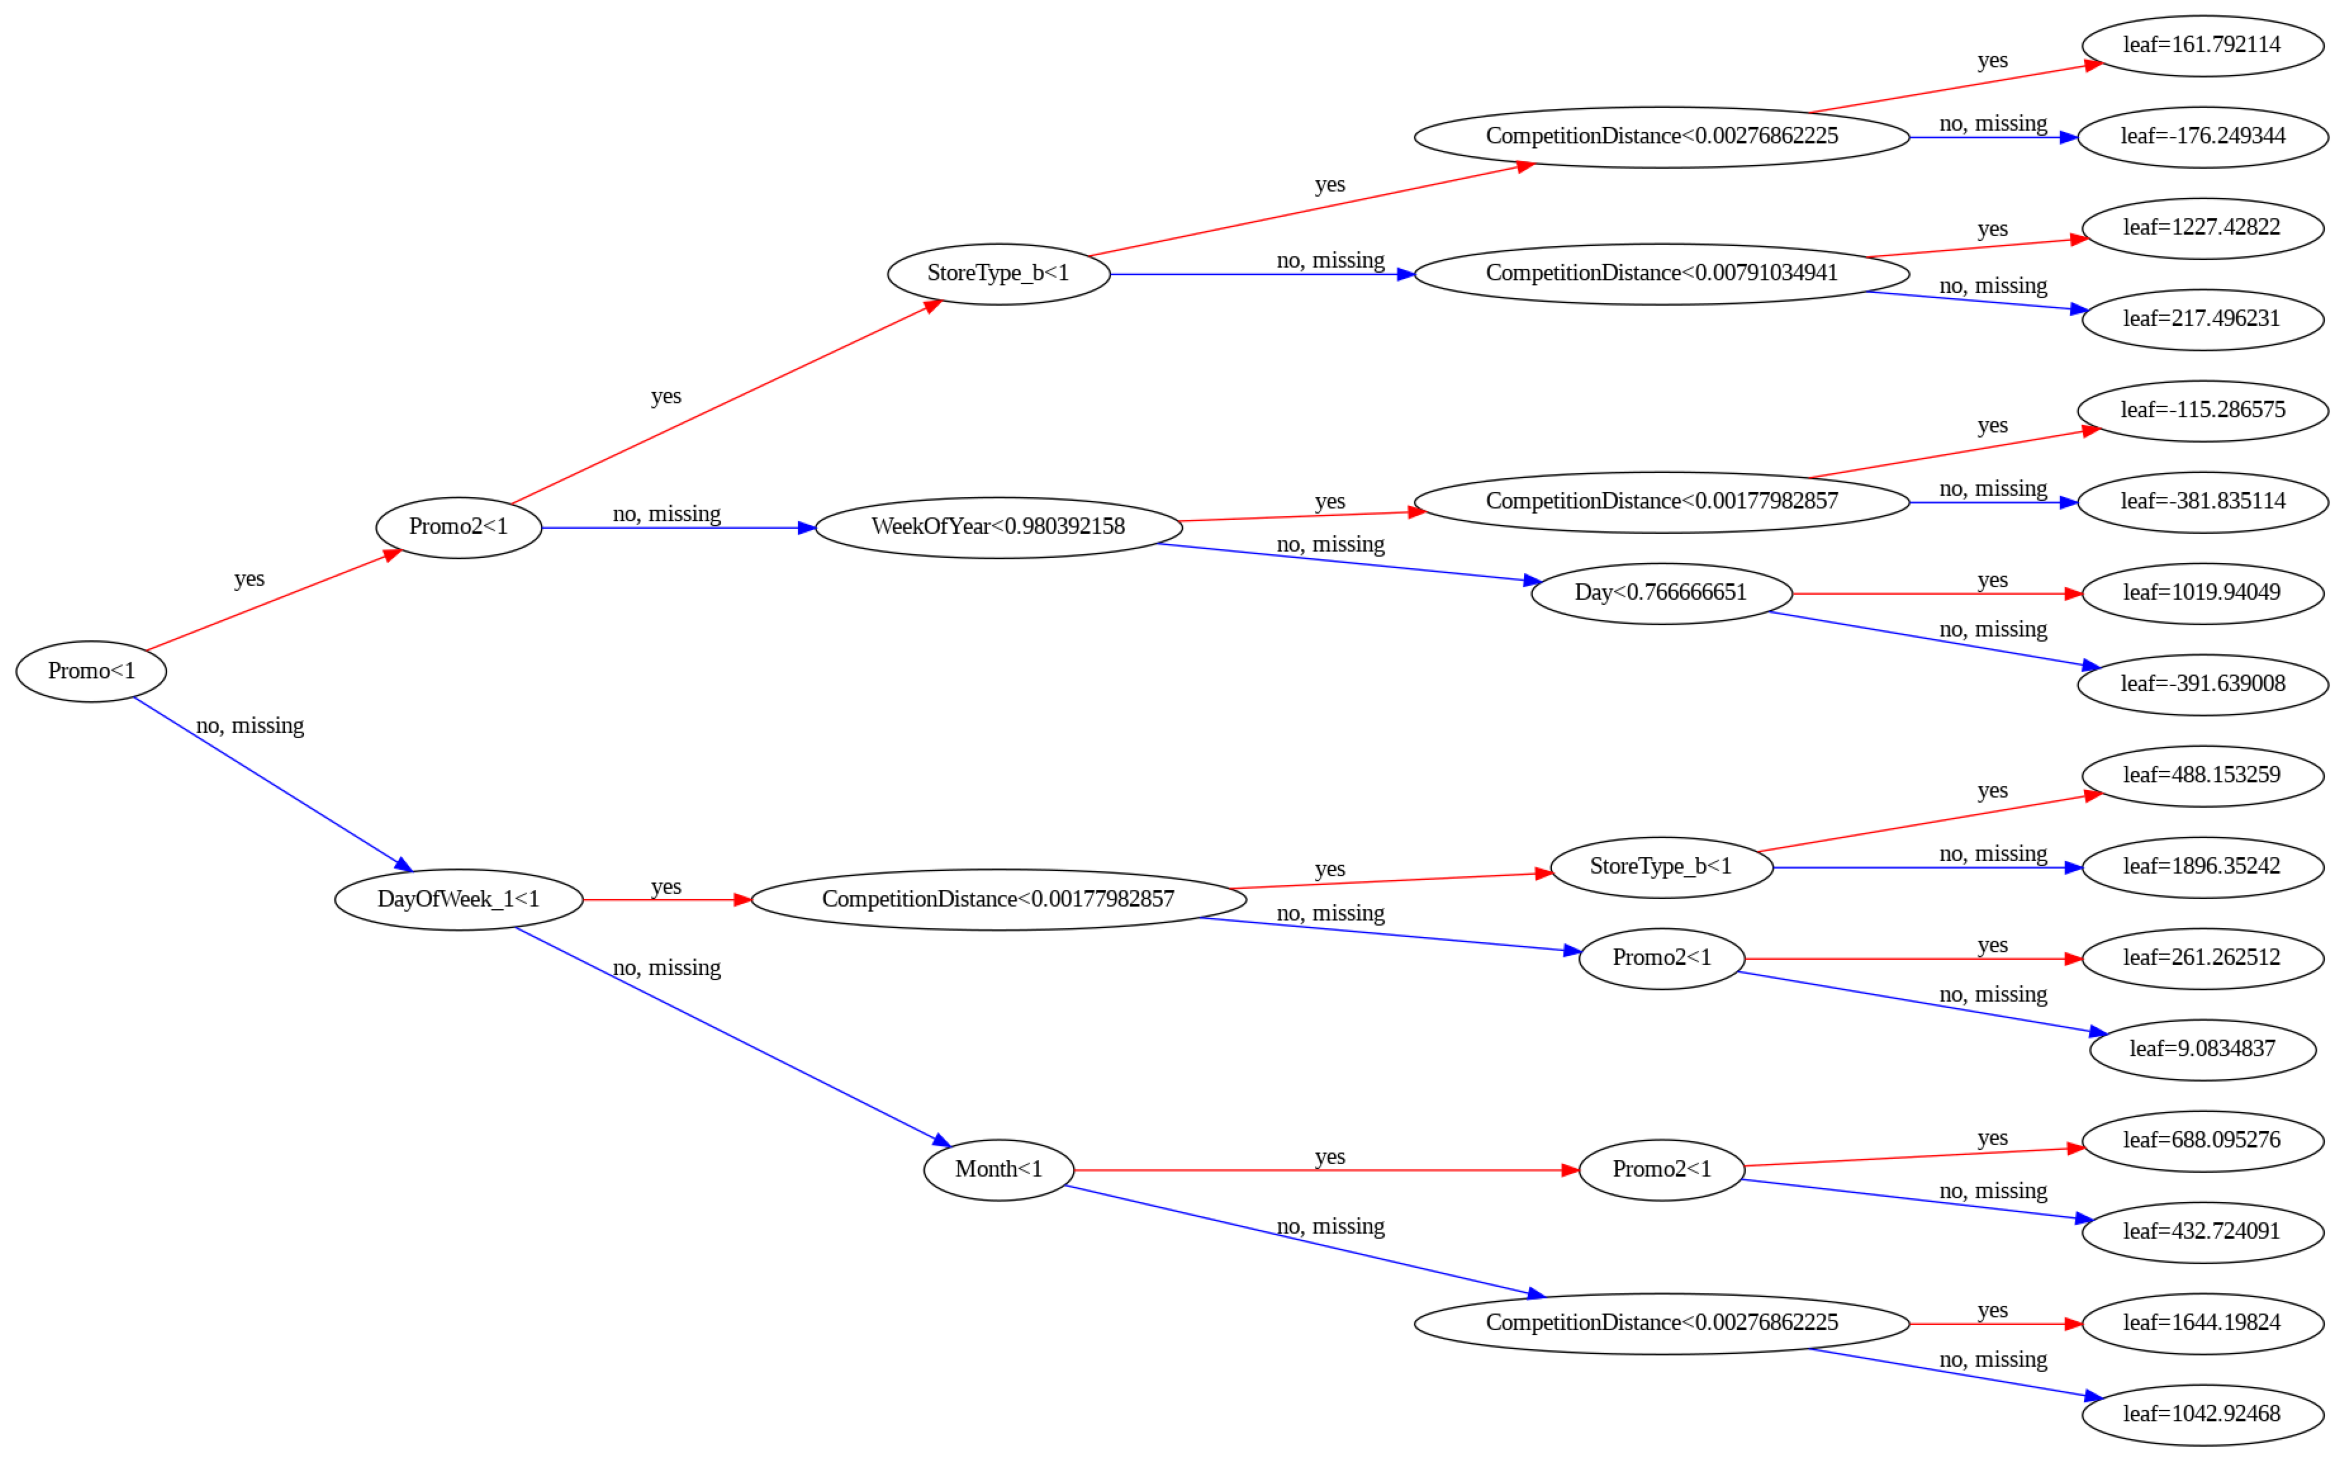

In [ ]:
plot_tree(model, rankdir = 'LR', num_trees = 1);

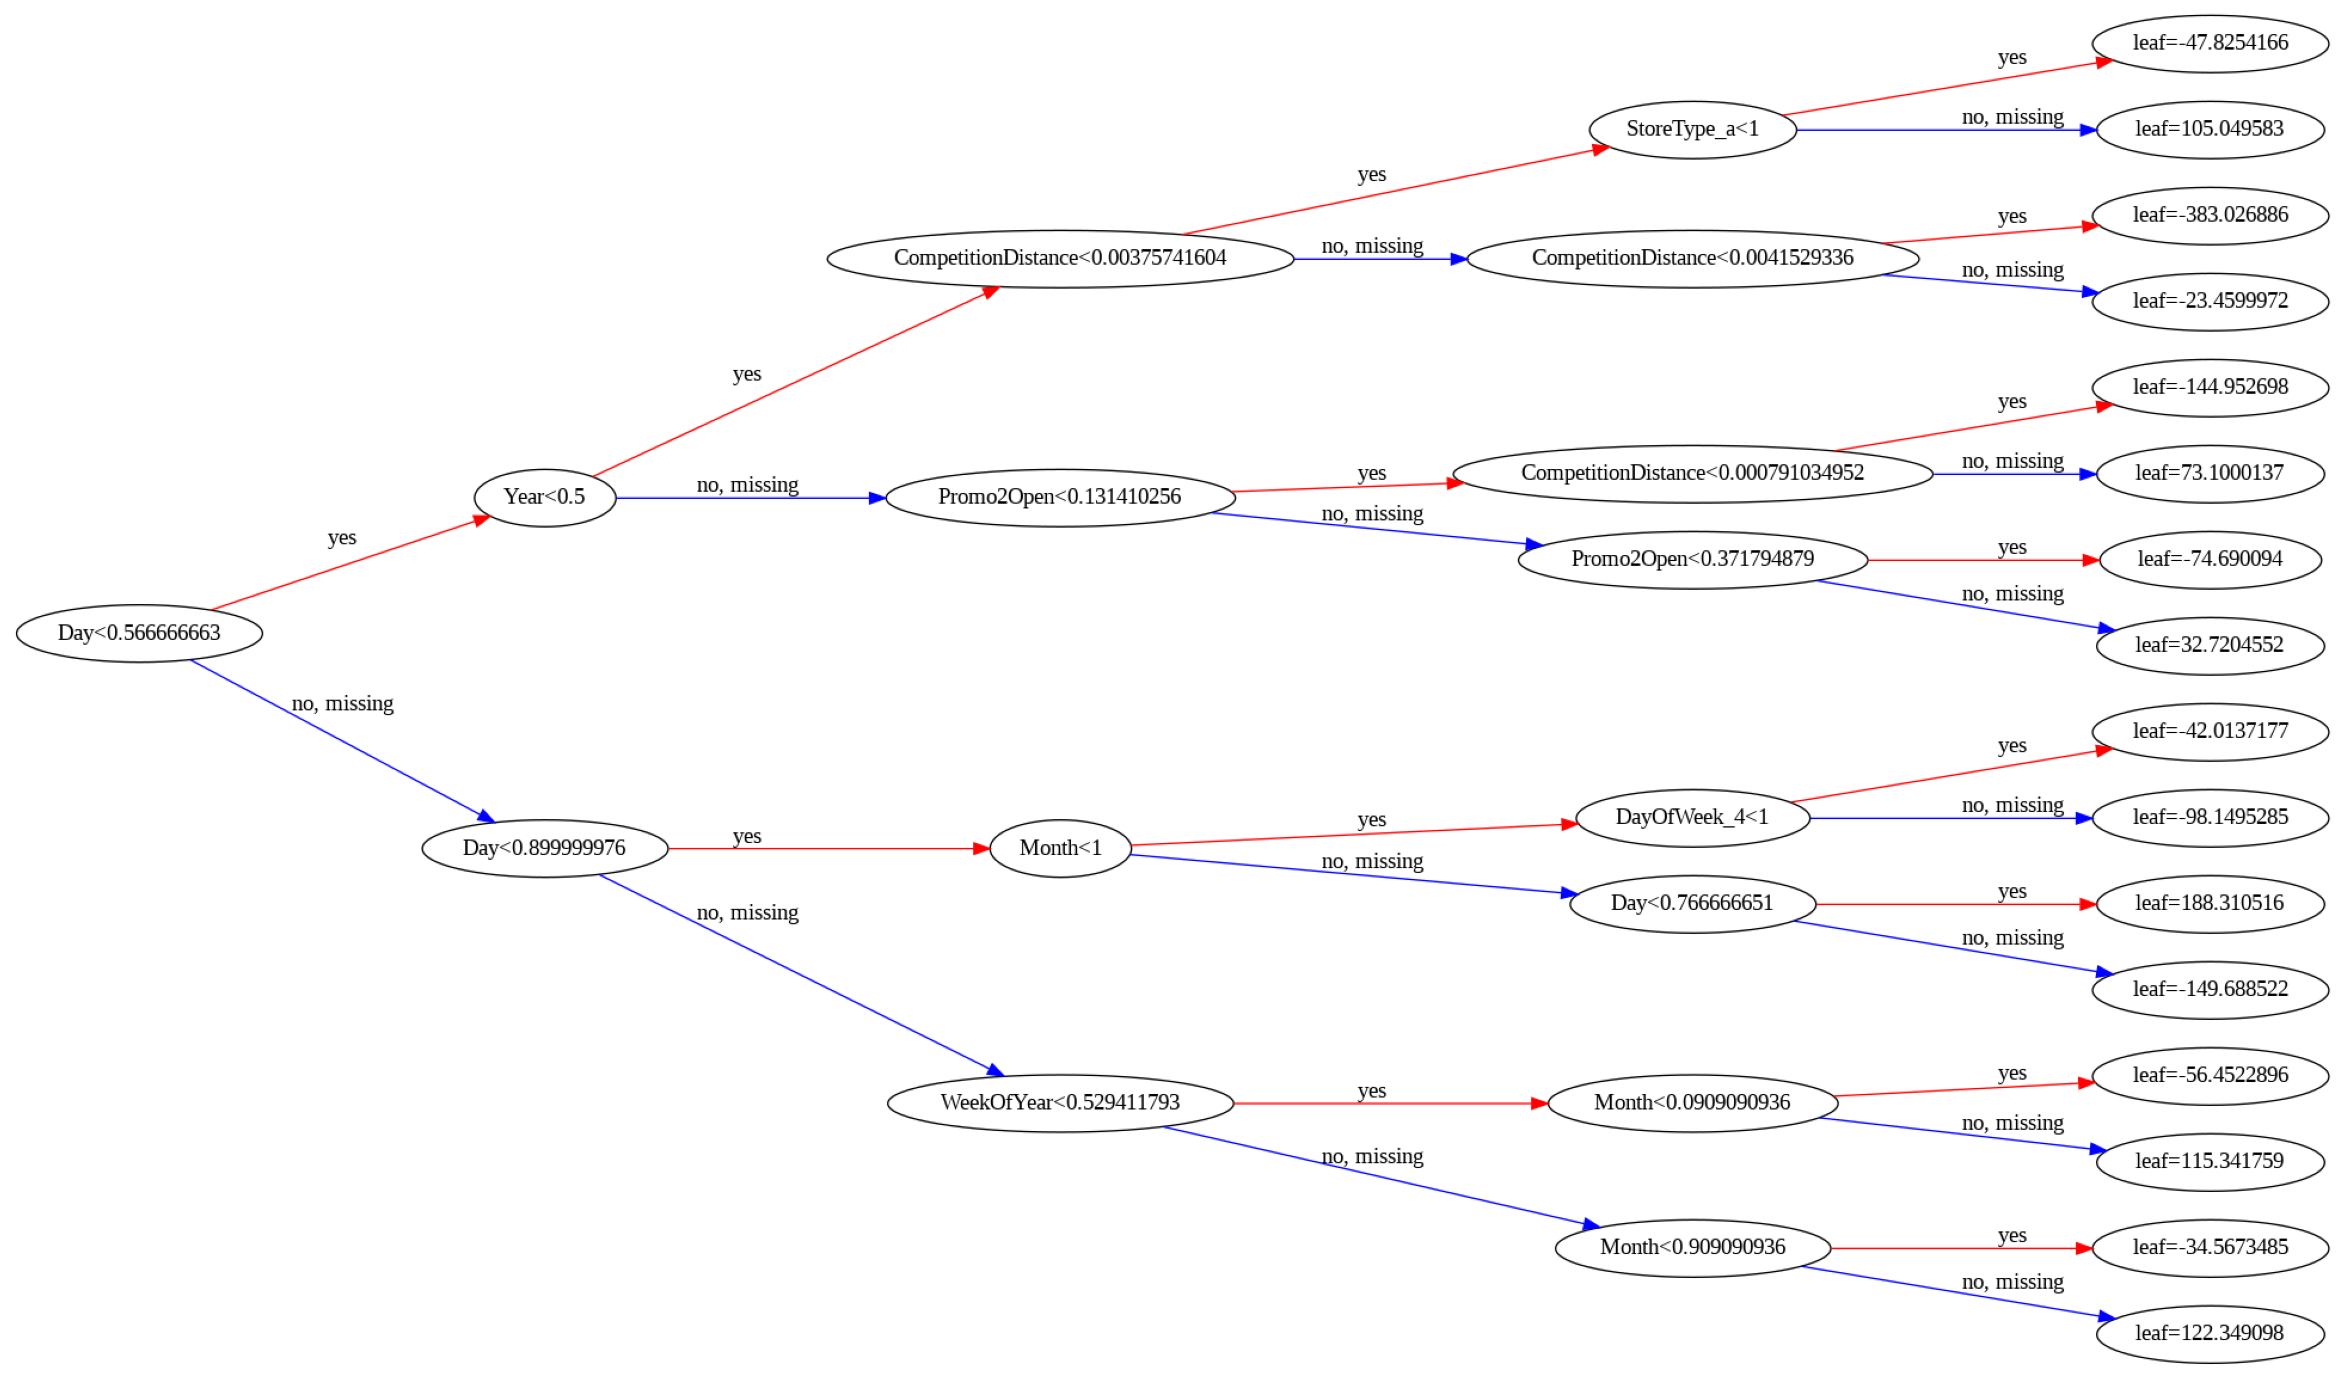

In [ ]:
plot_tree(model, rankdir ='LR', num_trees = 19);

We can also visualize the tree as text

In [ ]:
trees = model.get_booster().get_dump()

In [ ]:
len(trees)

20

In [ ]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[StoreType_b<1] yes=3,no=4,missing=4
		3:[Assortment_a<1] yes=7,no=8,missing=8
			7:[CompetitionDistance<0.0023071852] yes=15,no=16,missing=16
				15:leaf=181.975769
				16:leaf=-259.831238
			8:[WeekOfYear<0.921568632] yes=17,no=18,missing=18
				17:leaf=-467.055237
				18:leaf=-83.930191
		4:[CompetitionDistance<0.00791034941] yes=9,no=10,missing=10
			9:[CompetitionDistance<0.00593276182] yes=19,no=20,missing=20
				19:leaf=654.354065
				20:leaf=3492.14575
			10:[DayOfWeek_7<1] yes=21,no=22,missing=22
				21:leaf=-187.357132
				22:leaf=877.194702
	2:[DayOfWeek_1<1] yes=5,no=6,missing=6
		5:[Month<1] yes=11,no=12,missing=12
			11:[StoreType_b<1] yes=23,no=24,missing=24
				23:leaf=208.808884
				24:leaf=1208.23828
			12:[Day<0.200000003] yes=25,no=26,missing=26
				25:leaf=668.335449
				26:leaf=1160.14038
		6:[Month<1] yes=13,no=14,missing=14
			13:[CompetitionDistance<0.00138431112] yes=27,no=28,missing=28
				27:leaf=1261.60889
				28:leaf=752

# Feature importance
Just like decision trees and random forests, XBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
    }).sort_values('importance', ascending = False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Promo,0.328520
12,DayOfWeek_1,0.094180
24,StoreType_b,0.078951
26,StoreType_d,0.053953
5,Promo2,0.044485
27,Assortment_a,0.040774
3,CompetitionDistance,0.038032
9,Month,0.030609
2,SchoolHoliday,0.029630
11,WeekOfYear,0.029294


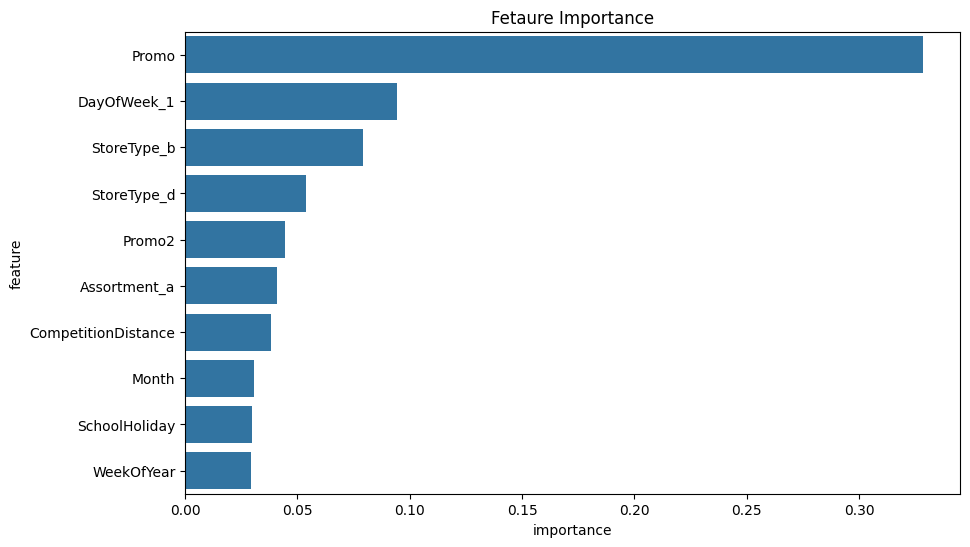

In [ ]:
plt.figure(figsize = (10, 6))
plt.title("Fetaure Importance")
sns.barplot(importance_df.head(10), x = 'importance', y = 'feature');

# K Fold Cross Validation
Notice that we didn't create a validation set before training our XBoost model. We'll use a different validation strategy this time, called K-fold cross validation

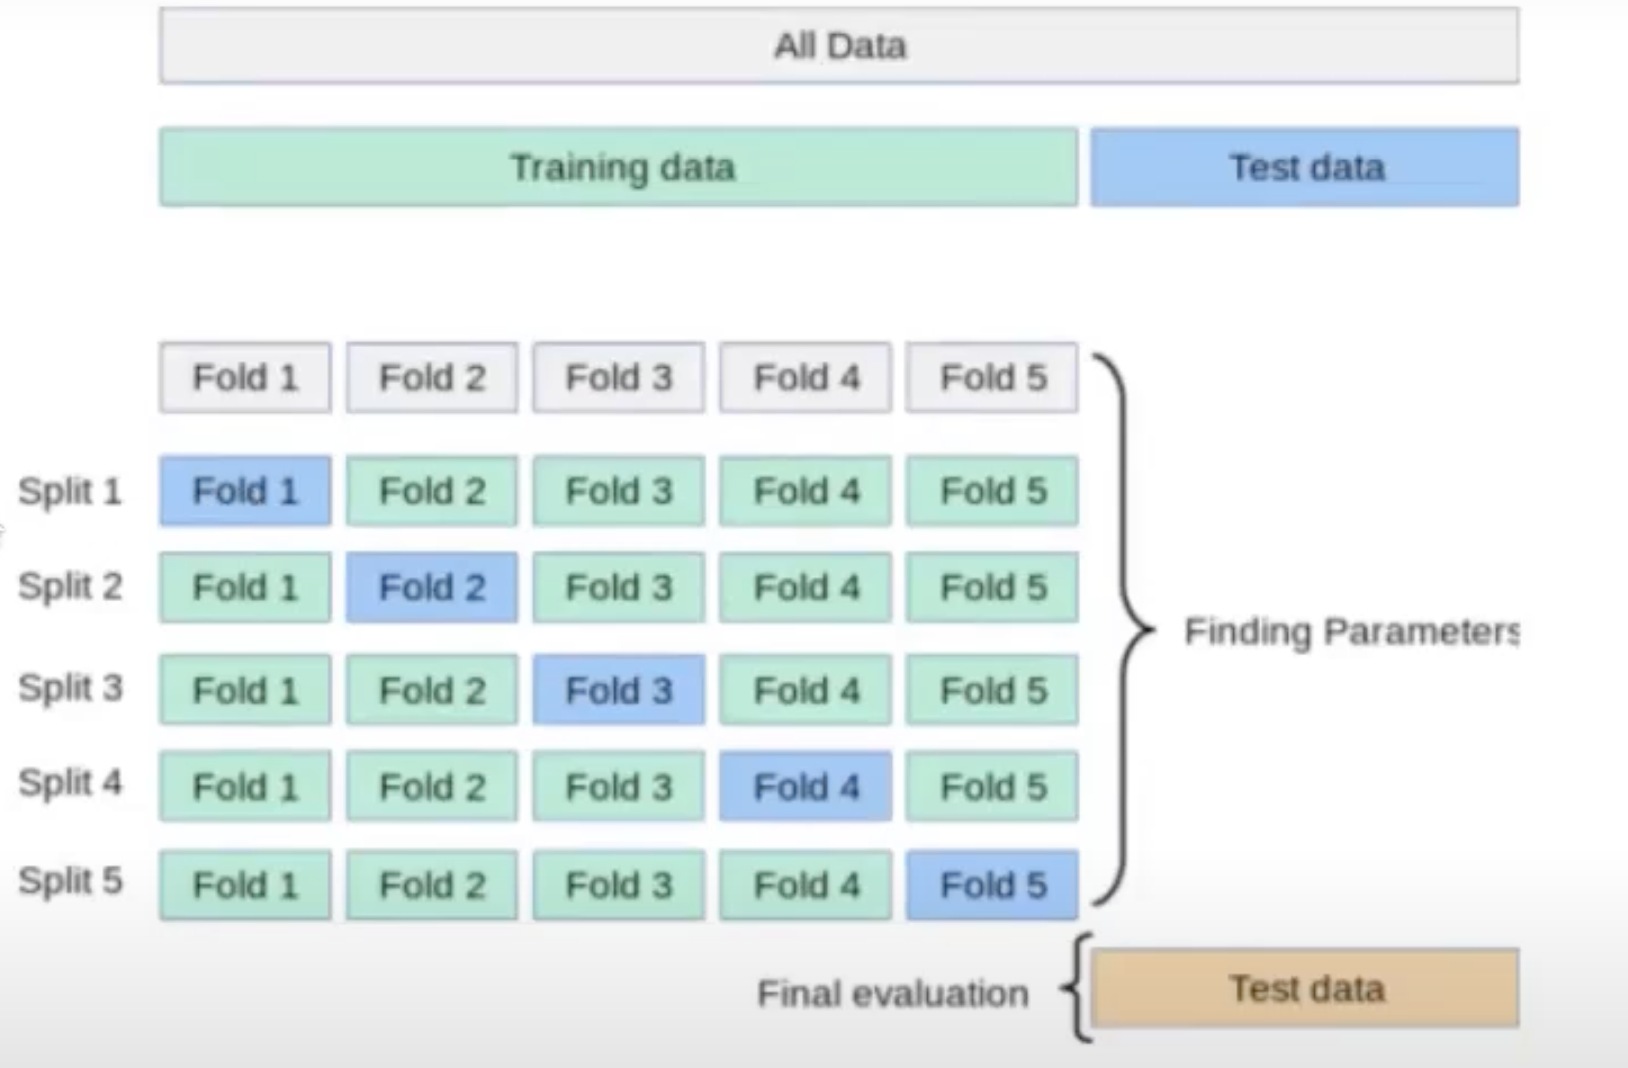

In [ ]:
from sklearn.model_selection import KFold

Let's define a helper function train_and_evaluate which trains a model the given parameters and returns the trained
model, training error and validation error.

In [ ]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
  model = XGBRegressor(random_state = 42, n_jobs = -1, ** params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  return model, train_rmse, val_rmse

Now, we can use the KFold utility to create the different training/validations splits and train a separate model for each fold.

In [ ]:
kfold = KFold(n_splits = 5)

In [ ]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(
        X_train,
        train_targets,
        X_val,
        val_targets,
        max_depth=4,
        n_estimators=20
    )
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))


Train RMSE: 2357.1386255373272, Validation RMSE: 2436.412629256383
Train RMSE: 2377.0306056086024, Validation RMSE: 2413.7915195807614
Train RMSE: 2388.1182969023957, Validation RMSE: 2364.858663852874
Train RMSE: 2390.442741418418, Validation RMSE: 2499.5004500899777
Train RMSE: 2371.0315265723484, Validation RMSE: 2442.0160728381784


for 1st split : Train RMSE: 2357.1386255373272, Validation RMSE: 2436.412629256383

for 2nd split : Train RMSE: 2377.0306056086024, Validation RMSE: 2413.7915195807614

for 3rd split : Train RMSE: 2388.1182969023957, Validation RMSE: 2364.858663852874

for 4th split : Train RMSE: 2390.442741418418, Validation RMSE: 2499.5004500899777

for 5th split : Train RMSE: 2371.0315265723484, Validation RMSE: 2442.0160728381784

Lets define a function to average predictions from 5 different models

In [ ]:
def predict_avg(models, inputs):
  return np.mean([model.predict(inputs) for model in models], axis = 0)

In [ ]:
preds = predict_avg(models, X)
preds

array([8025.4463, 7531.3657, 8644.928 , ..., 7973.172 , 7627.8726,
       9569.433 ], dtype=float32)

# Hyperparameter Tuning and Regularization
Just like other machine learning models, there are several hyperparameters we can to adjust the capacity of model and reduce overfitting.

Since it may take a long time to perform 5-fold cross validation for each set of parameters we wish to try, we'll just pick a random 10% sample of the dataset as the validation set.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size = 0.1)

In [ ]:
def test_params(**params):
  model = XGBRegressor(random_state = 42, n_jobs = -1, ** params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  print(f'Train RMSE: {train_rmse}, Validation RMSE: { val_rmse}')


# n_estimators
The number of trees to be created. More trees = greater capacity of the model.

In [ ]:
test_params(n_estimators = 10)

Train RMSE: 2273.3723848063255, Validation RMSE: 2267.218119193652


In [ ]:
test_params(n_estimators = 30)

Train RMSE: 1814.600851427112, Validation RMSE: 1812.7857016205749


In [ ]:
test_params(n_estimators = 100)

Train RMSE: 1175.230083855923, Validation RMSE: 1179.8017841993628


In [ ]:
test_params(n_estimators = 240)

Train RMSE: 901.3233673327237, Validation RMSE: 917.2581765784374


# max_depth
As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [ ]:
test_params(max_depth = 2, n_estimators = 10)

Train RMSE: 2686.166227172101, Validation RMSE: 2685.4925991333507


In [ ]:
test_params(max_depth = 5, n_estimators = 10)

Train RMSE: 2449.479128304628, Validation RMSE: 2445.0595084782703


In [ ]:
test_params(max_depth = 10, n_estimators = 10)

Train RMSE: 1932.5300773856018, Validation RMSE: 1950.983662156093


In [ ]:
test_params(max_depth = 20, n_estimators = 10)

Train RMSE: 678.9179350260235, Validation RMSE: 1098.4067438795157


# learning_rate
The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting,
and a low learning rate (close to 0) will lead to underfitting.

In [ ]:
test_params(n_estimators = 50, learning_rate = 0.01)

Train RMSE: 2789.2747265194225, Validation RMSE: 2785.804192688352


In [ ]:
test_params(n_estimators = 50, learning_rate = 0.1)

Train RMSE: 2167.170274805374, Validation RMSE: 2163.8433399855917


In [ ]:
test_params(n_estimators = 50, learning_rate = 0.3)

Train RMSE: 1570.5075612680125, Validation RMSE: 1568.701533115844


In [ ]:
test_params(n_estimators = 50, learning_rate = 0.9)

Train RMSE: 1113.548382424401, Validation RMSE: 1120.2628039884212


In [ ]:
test_params(n_estimators = 50, learning_rate = 0.99)

Train RMSE: 1139.1336071769633, Validation RMSE: 1153.3439968196826


# booster
Instead of using Decision Trees, XBoost can also train a linear model for each iteration. This can be configured using booster.

In [ ]:
test_params(booster = 'gblinear')

Train RMSE: 2728.386153021599, Validation RMSE: 2724.9791742323464


# Putting it Together and Making Predictions
Let's train a final model on the entire training set with custom hyperparameters.

In [ ]:
model = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 100,
                   learning_rate = 0.2, max_depth = 10, subsample = 0.9, colsample_bytree = 0.7)

In [ ]:
model.fit(X, targets)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

Now that the model is trained we can make predictions on the test set

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
test_preds

array([ 4388.5635,  7797.2065,  9224.767 , ...,  6031.8027, 23338.283 ,
        7600.6943], dtype=float32)

In [ ]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'model.pkl'")

NameError: name 'model' is not defined